## Customer Churn prediction from a bank
- Use of ANN
- Experiment with parameters such as early stopping, dropout layer, epochs, batch_size, validation_split.
- Plotting the accuracy and loss graphs for train and test data

In [152]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models

In [153]:
print(tf.__version__)

2.13.0


In [154]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [155]:
data = dataset.iloc[:,3:-1]
labels = dataset.iloc[:,-1]
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [156]:
## Feature engineering
geography = pd.get_dummies(data['Geography'],drop_first = True) # This does one hot encoding
gender = pd.get_dummies(data['Gender'],drop_first = True)

In [157]:
## Now we can drop the geogrpahy and gender from our data frame
data = data.drop(['Geography','Gender'],axis = 1) # Axis = 1, because we need to drop the column and not the row
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [158]:
data = pd.concat([data,geography,gender],axis = 1)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [159]:
## Splitting of the data set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size = 0.2, random_state = 0)

In [160]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

In [161]:
scaler = StandardScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [162]:
print(X_train_trf.shape)
print(X_test_trf.shape)

(8000, 11)
(2000, 11)


In [176]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # Type of layer
from tensorflow.keras.layers import LeakyReLU,ReLU,ELU,PReLU # Activation functions
from tensorflow.keras.layers import Dropout

In [177]:
## Part 2 creation of ANN using Tensorflow.
model = models.Sequential([
    layers.Dense(11,activation = 'relu'),
    layers.Dense(7,activation = 'relu'),
    layers.Dropout(0.3),# Dropout will deactivate 30% of neurons in the layer if the data is overfitting. It is similar to regularisation done in Linear Regression
    layers.Dense(6,activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
])

In [178]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy']) ## By default the learning rate is initialised as 0.01.
# To change the default learning rate do the following
# import tensorflow
# opt = tensorflow.keras.optimizers.adam(learning_rate = 0.001) ## This is some adam optimiser obj. Then you can add this to the compile function
# model.compile(optimizer = opt,loss = 'binary_crossentropy',metrics = ['accuracy'])

In [179]:
# Early Stopping
# When the accuracy of the validation data starts to stagnate the remaining epochs are stopped and then time is saved.
# This helps you find the suitable number of epochs as per your batch size and other params.
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [180]:
model_history = model.fit(X_train_trf,Y_train,validation_split = 0.20, batch_size = 100, epochs = 1000,callbacks = early_stopping)
# Validation split means that 33% of data will not be used for Training the model
# It will be reserved and kept and validated from the trained model on each epoch.

Epoch 1/1000
64/64 [==============================] - 3s 7ms/step - loss: 0.6015 - accuracy: 0.7622 - val_loss: 0.5551 - val_accuracy: 0.7969
Epoch 2/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.5331 - accuracy: 0.7956 - val_loss: 0.5101 - val_accuracy: 0.7969
Epoch 3/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.5061 - accuracy: 0.7958 - val_loss: 0.4895 - val_accuracy: 0.7969
Epoch 4/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.4818 - accuracy: 0.7958 - val_loss: 0.4772 - val_accuracy: 0.7969
Epoch 5/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.4744 - accuracy: 0.7958 - val_loss: 0.4678 - val_accuracy: 0.7969
Epoch 6/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.4644 - accuracy: 0.7958 - val_loss: 0.4607 - val_accuracy: 0.7969
Epoch 7/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.4577 - accuracy: 0.7958 - val_loss: 0.4527 - val_accuracy: 0.7969
Epoch 

In [181]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

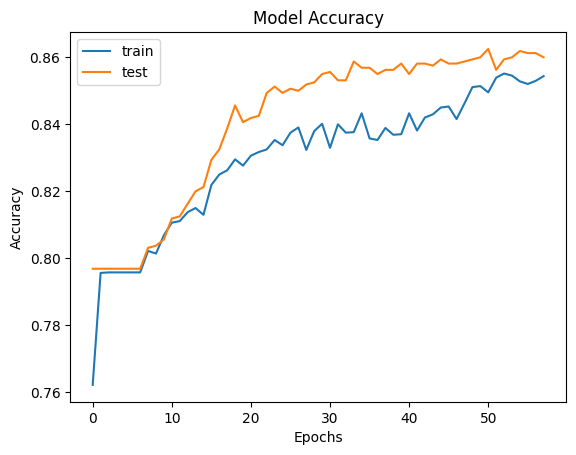

In [182]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

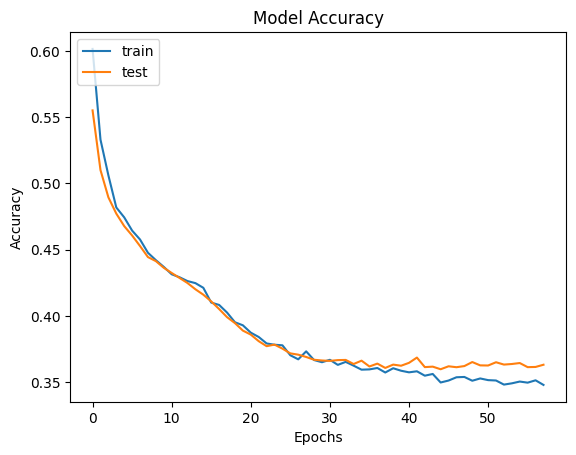

In [183]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [184]:
test_loss, test_accuracy = model.evaluate(X_test_trf, Y_test)
print(f'Test accuracy: {test_accuracy}')

63/63 [==============================] - 0s 3ms/step - loss: 0.3572 - accuracy: 0.8575
Test accuracy: 0.8575000166893005


In [185]:
Y_pred = model.predict(X_test_trf)
Y_pred = (Y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


In [186]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[1513,   82],
       [ 203,  202]])

In [187]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_pred,Y_test)
score

0.8575

In [188]:
## Get and store the weights of the Neural Network
Weights = model.get_weights()
# Weights

### Visualising the data in 2-Dimensions by reducing the dimensionality using PCA

In [189]:
# from sklearn.decomposition import PCA

In [190]:
# pca = PCA(n_components = 2)
# X_train_trf_pca = pca.fit_transform(X_train_trf)
# X_test_trf_pca = pca.transform(X_test_trf)

In [192]:
# import plotly.express as px
# y_train_trf = Y_train.astype(str)
# fig = px.scatter_3d(x = X_train_trf_pca[:,0],
#                     y = X_train_trf_pca[:,1],
#                     z = X_train_trf_pca[:,2],
#                     color = y_train_trf)
# fig = px.scatter(x = X_train_trf_pca[:,0],
#                     y = X_train_trf_pca[:,1],
#                     color = y_train_trf)
# fig.update_layout(margin = dict(l=20,r=20,t=20,b=20))
# fig.show()